# Investment Assignment

### Checkpoint 1 - Data cleaning 1

#### Step 1:Importing the required libraries below

In [139]:
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt



#### Step2 : Loading the 'companies.csv' to pandas dataframe

In [140]:
companies  =  pd.read_csv('companies.csv',encoding = "ISO-8859-1")


#### Step 3 :Loading 'rounds2.csv' to pandas dataframe

In [141]:
rounds2  =  pd.read_csv('rounds2.csv',encoding = "ISO-8859-1")


 #### Step 4 :  Cleaning 'companies.csv' file as below
 
   i. The  column containing common data are  below
   
                       companies.csv :'permalink' 
                       
                       
   
   ii. Creating a new column 'company_permalink_lower' to convert the 'permalink' column to lower   case
    
    
  iii. Column 'company_permalink_lower' will act as the unique identifier for companies dataframe

In [142]:
companies['company_permalink_lower'] = companies['permalink'].str.lower()

#### Step 5 : Cleaning 'rounds2.csv' file as below

  i. The column containing common data are below

                   rounds2.csv :'company_permalink'
  
  ii. Creating a new column 'company_permalink_lower' to convert the 'company_permalink' column to lower   case 
  
  iii. company_permalink_lower column will act as common column between 'companies.csv' and 'rounds2.csv'


In [143]:
rounds2['company_permalink_lower'] = rounds2['company_permalink'].str.lower()

#### Step6 : Unique Company values present in rounds2 : 66370

In [144]:
rounds2['company_permalink_lower'].nunique()

66370

#### Step 7 : Unique Company values present in companies: 66368

In [145]:
companies['company_permalink_lower'].nunique()
 

66368

#### Step 8 : Companies present in 'companies.csv' which are not in 'rounds2.csv' : YES

In [146]:
companies['permalink'][~companies['permalink'].str.lower().isin(rounds2['company_permalink'].str.lower())].count()

5

#### Step 9 : Merging 'rounds2' and 'companies' dataframe with common column 'company_permalink_lower' to master_frame dataframe 

In [147]:
master_frame = pd.merge(companies,rounds2,how='inner', on='company_permalink_lower')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 17 columns):
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
company_permalink_lower    114942 non-null object
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
dtypes: float64(1), object(16)
memory usa

### Checkpoint 2 - Funding type Analysis

#### Step:1 Cleaning the NaN values  for raised_amount_usd in   funding type: 'venture'

   Solution :  Replace the NaN values of  raised_amount_usd for 'venture' funding type with median of raised_amount_usd having venture funding type. As the 'raised_amount_usd' column has outliers 'median' provides the most representative value when compared to 'mean' and 'mode'


In [148]:
master_frame['raised_amount_usd'].loc[master_frame.funding_round_type=='venture']=master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='venture'].fillna(master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='venture'].median())
print('Representative amount for Venture :',master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='venture'].median())

Representative amount for Venture : 5000000.0


#### Step:2 Cleaning the NaN values  for raised_amount_usd in   funding type: 'seed'

  Solution :  Replace the NaN values of  raised_amount_usd for 'seed' funding type with median of raised_amount_usd having seed funding type


In [149]:
master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='seed']=master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='seed'].fillna(master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='seed'].median())
print('Representative amount for Seed :',master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='seed'].median())

Representative amount for Seed : 275000.0


#### Step:3 Cleaning the NaN values  for raised_amount_usd in  funding type: 'angel'

Solution :  Replace the NaN values of  raised_amount_usd for 'angel' funding type with median of raised_amount_usd having angel funding type

In [150]:
master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='angel']=master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='angel'].fillna(master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='angel'].median())
print('Representative amount for Angel :',master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='angel'].median())

Representative amount for Angel : 400000.0


#### Step:4 Cleaning the NaN values  for raised_amount_usd in   funding type: 'private equity'

Solution :  Replace the NaN values of  raised_amount_usd for 'private_equity' funding type with median of raised_amount_usd having 'private_equity' funding type

In [151]:
master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='private_equity']=master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='private_equity'].fillna(master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='private_equity'].median())
print('Representative amount for Private Equity :',master_frame['raised_amount_usd'].loc[master_frame['funding_round_type']=='private_equity'].median())

Representative amount for Private Equity : 20000000.0


#### Step 5: Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, the investment type suitable for them is : 'venture'

In [152]:
funding_round_type_amt =  master_frame.groupby(['funding_round_type'])['raised_amount_usd'].median().reset_index(name='amount')
ft = funding_round_type_amt.loc[(funding_round_type_amt['amount'] >=5000000) & (funding_round_type_amt['amount'] <=15000000) & funding_round_type_amt['funding_round_type'].isin(['venture','angel','seed','private_equity'])]
print('Funding type:' , ft['funding_round_type'].array[0])

Funding type: venture


## Check point 3:  Country Analysis

#### Step 1: Read 'mapping.csv' file using encoding = "ISO-8859-1"

In [153]:
mapping =  pd.read_csv('mapping.csv',encoding = "ISO-8859-1")
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


#### Step2: Countries with highest amount of funding for funding type :'venture'

In [154]:
venture_countries = master_frame.loc[master_frame['funding_round_type']=='venture'].groupby(['country_code']).sum().astype('int64').reset_index()

#### Step3 :  Top9 countries with highest amount of funding for funding type : 'venture'

In [155]:
top9=venture_countries.nlargest(9,'raised_amount_usd')
top9


country_code  raised_amount_usd
100          USA       433675842796
16           CHN        42450418773
31           GBR        21485627416
41           IND        15231858718
13           CAN        10033332317
30           FRA         7599536732
23           DEU         7486959822
44           ISR         7477514579
47           JPN         3583676611

#### Step 4: Alpha country codes of english speaking countries identified from Wikipedia link

In [156]:
english_countries = pd.DataFrame({'english_speaking_countries':['AUS','NZL','GBR','USA','ATG','BHS','BRB','BLZ','BWA','BDI','CMR','CAN','DMA','SWZ','FJI','GMB','GHA','GRD','GUY','IND','IRL','JAM','KEN','KIR','LSO','LBR','MWI','MLT','MHL','MUS','FSM','NAM','NRU','NGA','PAK','PLW','PNG','PHL','RWA','KNA','LCA','VCT','WSM','SYC','SLE','SGP','SLB','ZAF','SSD','SDN','TZA','TON','TTO','TUV','UGA','VUT','ZMB','ZWE']})

#### Step 5 : Identify Top3 english speaking countries

In [157]:
top3 = top9.loc[top9['country_code'].isin(english_countries['english_speaking_countries'])].nlargest(3,'raised_amount_usd')
print('Top3 English speaking countries:' ,top3['country_code'].array)

Top3 English speaking countries: <PandasArray>
['USA', 'GBR', 'IND']
Length: 3, dtype: object


### Checkpoint 4 - Sector Analysis 1

#### Step 1:  Obtaining main_sector for each category_list
   
   i. Variable 'mapping_sectors' will hold all the main_sector values for each category_list

In [158]:
mapping['main_sector']= mapping.apply(lambda x:x[x==1].index[0] ,axis=1)
mapping_sectors = mapping[['category_list','main_sector']]
mapping_sectors


category_list                              main_sector
0                 NaN                                   Blanks
1                  3D                            Manufacturing
2         3D Printing                            Manufacturing
3       3D Technology                            Manufacturing
4          Accounting  Social, Finance, Analytics, Advertising
..                ...                                      ...
683         Wholesale                                   Others
684  Wine And Spirits                            Entertainment
685          Wireless                            Entertainment
686             Women                                   Others
687      Young Adults                                   Others

[688 rows x 2 columns]

#### Step2 : Cleaning category_list  which has NaN values

i. There is only 1 record which has cagtegory_list : NaN  and it has main_sector : Blank.



In [159]:
mapping_sectors = mapping_sectors.dropna()

ii.Replacing the junk letter '0' from category_list with 'na'

In [160]:
mapping_sectors.category_list =  mapping_sectors['category_list'].str.replace('0', 'na')

#### Step 3: Cleaning 'category_list' to identify the 'primary_sector'
  
   i.The category list cotains a list of multiple sub-sectors separated by a pipe (vertical bar |). 
   
   ii.The first string before the vertical bar will be considered the 'primary_sector'

In [161]:
master_frame['primary_sector']= master_frame['category_list'].str.split('|').str[0]

#### Step 4: Converting 'primary_sector' to  lower case for merging with mapping_sector dataframe 
  
   i.The common column used for merging of primary sector is 'primary_sector_lower'

In [162]:
master_frame['primary_sector_lower'] = master_frame['primary_sector'].str.lower()

#### Step 4: Converting 'category_list' to  lower case for merging with master_frame  dataframe
  
   i.The common column used for merging of primary sector is 'primary_sector_lower'

In [163]:
mapping_sectors['primary_sector_lower']= mapping_sectors.category_list.str.lower()

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Step 5 :  Merging mapping_sectors with master_frame


In [164]:
master_frame = pd.merge(master_frame , mapping_sectors ,how='inner',on= 'primary_sector_lower')

In [165]:
master_frame.head(3)

permalink   name          homepage_url  \
0  /Organization/-Fame  #fame    http://livfame.com   
1  /Organization/90Min  90min  http://www.90min.com   
2  /Organization/90Min  90min  http://www.90min.com   

                       category_list_x     status country_code state_code  \
0                                Media  operating          IND         16   
1  Media|News|Publishing|Soccer|Sports  operating          GBR         H9   
2  Media|News|Publishing|Soccer|Sports  operating          GBR         H9   

   region    city  founded_at  ...    company_permalink  \
0  Mumbai  Mumbai         NaN  ...  /organization/-fame   
1  London  London  01-01-2011  ...  /organization/90min   
2  London  London  01-01-2011  ...  /ORGANIZATION/90MIN   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6            venture   
2  /funding-round/bd626ed022f5c66574b1afe234f3c90d            venture   

  funding_round_code   funded_at raised_amount_usd  primary_sector  \
0                  B  05-01-2015        10000000.0           Media   
1                NaN  06-10-2015        15000000.0           Media   
2                NaN  07-05-2013         5800000.0           Media   

  primary_sector_lower category_list_y    main_sector  
0                media           Media  Entertainment  
1                media           Media  Entertainment  
2                media           Media  Entertainment  

[3 rows x 21 columns]

#### Step 6 : Removing the redundent columns after merging

i. The coulmns 'category_list_x' will be renames to 'category_list' and 'category_list_y' column will be removed

In [166]:
master_frame['category_list'] =master_frame['category_list_x']
master_frame = master_frame.drop('category_list_x' , axis = 1)
master_frame = master_frame.drop('category_list_y' , axis = 1)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111437 entries, 0 to 111436
Data columns (total 20 columns):
permalink                  111437 non-null object
name                       111436 non-null object
homepage_url               106281 non-null object
status                     111437 non-null object
country_code               104440 non-null object
state_code                 102232 non-null object
region                     102986 non-null object
city                       102989 non-null object
founded_at                 92760 non-null object
company_permalink_lower    111437 non-null object
company_permalink          111437 non-null object
funding_round_permalink    111437 non-null object
funding_round_type         111437 non-null object
funding_round_code         30646 non-null object
funded_at                  111437 non-null object
raised_amount_usd          105945 non-null float64
primary_sector             111437 non-null object
primary_sector_lower       111437 non-nu

### Checkpoint 5: Sector Analysis 2

 Top 3 Engish speaking countries identified :  USA,GBR,IND
 
 Funding type Identified : venture

#### Creating D1 dataframe for country_code 'USA'  and funding_round_type 'venture'

In [167]:
D1 =  master_frame[(master_frame['country_code'] == 'USA') & (master_frame['funding_round_type'] =='venture')]
(D1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38020 entries, 10 to 111436
Data columns (total 20 columns):
permalink                  38020 non-null object
name                       38020 non-null object
homepage_url               36254 non-null object
status                     38020 non-null object
country_code               38020 non-null object
state_code                 38004 non-null object
region                     37980 non-null object
city                       37980 non-null object
founded_at                 32049 non-null object
company_permalink_lower    38020 non-null object
company_permalink          38020 non-null object
funding_round_permalink    38020 non-null object
funding_round_type         38020 non-null object
funding_round_code         20690 non-null object
funded_at                  38020 non-null object
raised_amount_usd          38020 non-null float64
primary_sector             38020 non-null object
primary_sector_lower       38020 non-null object
main_s

1 : Total number of investments across sector for D1  :35421

In [168]:
D1_investment_based_on_count = D1['raised_amount_usd'].count()
(D1_investment_based_on_count)

38020

2 : Total amount of investments across sector for D1  : 401,712,581,395

In [169]:
D1_investment_based_on_amount = D1['raised_amount_usd'].sum().astype('int64')
(D1_investment_based_on_amount)

430282724225

3.Top sector (based on count of investments) from D1: 'Others'

In [170]:
D1_topSector_based_on_count = D1.groupby(['main_sector'])['raised_amount_usd'].count().reset_index(name='raised_amount_usd_count').nlargest(3,'raised_amount_usd_count').iloc[[0]]
(D1_topSector_based_on_count)

main_sector  raised_amount_usd_count
6      Others                     8763

4. Second-best sector (based on count of investments) from D1:'Cleantech / Semiconductors'

In [171]:
D1_secondBestSector_based_on_count = D1.groupby(['main_sector'])['raised_amount_usd'].count().reset_index(name='raised_amount_usd_count').nlargest(3,'raised_amount_usd_count').iloc[[1]]
(D1_secondBestSector_based_on_count)

main_sector  raised_amount_usd_count
1  Cleantech / Semiconductors                     8268

5.Third-best sector (based on count of investments) from D1 :'Social, Finance, Analytics, Advertising'

In [172]:
D1_thirdBestSector_based_on_count = D1.groupby(['main_sector'])['raised_amount_usd'].count().reset_index(name='raised_amount_usd_count').nlargest(3,'raised_amount_usd_count').iloc[[-1]]
D1_thirdBestSector_based_on_count

main_sector  raised_amount_usd_count
7  Social, Finance, Analytics, Advertising                     7822

6. Number of investments in the top sector (refer to point 3) from D1 :8693

In [173]:
D1_no_of_investments_topSector = D1.loc[D1['main_sector']== D1_topSector_based_on_count['main_sector'].array[0]]['raised_amount_usd'].count()
D1_no_of_investments_topSector

8763

7.Number of investments in the second-best sector (refer to point 4) from D1 :8113

In [174]:
D1_no_of_investments_secondBest = D1.loc[D1['main_sector']== D1_secondBestSector_based_on_count['main_sector'].array[0]]['raised_amount_usd'].count()
D1_no_of_investments_secondBest


8268

8.  Number of investments in the third-best sector (refer to point 5) from D1 :5553

In [175]:
D1_no_of_investments_thirdBestSector = D1.loc[D1['main_sector']== D1_thirdBestSector_based_on_count['main_sector'].array[0]]['raised_amount_usd'].count()
D1_no_of_investments_thirdBestSector


7822

9. For the top sector count-wise (point 3), which company received the highest investment from D1 ? :'Sofi'

In [176]:
D1_highest_investment_topSector = D1[D1['main_sector']==D1_topSector_based_on_count['main_sector'].array[0]].groupby(['name']).sum().astype('int64').reset_index().sort_values(by='raised_amount_usd',ascending=False).iloc[[0]]
D1_highest_investment_topSector


name  raised_amount_usd
3802  SoFi         1365199900

10. For the second-best sector count-wise (point 4), which company received the highest investment? :'Freescale Semiconductor'

In [177]:
D1_highest_investment_secondBestSector = D1[D1['main_sector']==D1_secondBestSector_based_on_count['main_sector'].array[0]].groupby(['name']).sum().astype('int64').reset_index().sort_values(by='raised_amount_usd',ascending=False).iloc[[0]]
D1_highest_investment_secondBestSector

name  raised_amount_usd
1411  Freescale Semiconductor        17600000000

#### Creating D2 dataframe for country_code 'GBR'  and funding_round_type 'venture'

In [178]:
D2 =  master_frame[(master_frame['country_code'] == 'GBR') & (master_frame['funding_round_type'] =='venture')]
(D2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2264 entries, 1 to 110925
Data columns (total 20 columns):
permalink                  2264 non-null object
name                       2264 non-null object
homepage_url               2167 non-null object
status                     2264 non-null object
country_code               2264 non-null object
state_code                 2208 non-null object
region                     2140 non-null object
city                       2140 non-null object
founded_at                 1719 non-null object
company_permalink_lower    2264 non-null object
company_permalink          2264 non-null object
funding_round_permalink    2264 non-null object
funding_round_type         2264 non-null object
funding_round_code         1144 non-null object
funded_at                  2264 non-null object
raised_amount_usd          2264 non-null float64
primary_sector             2264 non-null object
primary_sector_lower       2264 non-null object
main_sector               

1. Total number of investments across sector for D2  : 2120

In [179]:
D2_investment_based_on_count = D2['raised_amount_usd'].count()
(D2_investment_based_on_count)

2264

2. Total amount of investments across sector for D2  :19,944,390,319

In [180]:
D2_investment_based_on_amount = D2['raised_amount_usd'].sum().astype('int64')
(D2_investment_based_on_amount)

21124243770

3. Top sector (based on count of investments) from D2: 'Others'

In [181]:
D2_topSector_based_on_count = D2.groupby(['main_sector'])['raised_amount_usd'].count().reset_index(name='raised_amount_usd_count').nlargest(3,'raised_amount_usd_count').iloc[[0]]
(D2_topSector_based_on_count)

main_sector  raised_amount_usd_count
6      Others                      580

4. Second-best sector (based on count of investments) from D2 : 'Cleantech / Semiconductors'

In [182]:
D2_secondBestSector_based_on_count = D2.groupby(['main_sector'])['raised_amount_usd'].count().reset_index(name='raised_amount_usd_count').nlargest(3,'raised_amount_usd_count').iloc[[1]]
(D2_secondBestSector_based_on_count)

main_sector  raised_amount_usd_count
7  Social, Finance, Analytics, Advertising                      481

5.Third-best sector (based on count of investments) from D2 : 'Social, Finance, Analytics, Advertising'

In [183]:
D2_thirdBestSector_based_on_count = D2.groupby(['main_sector'])['raised_amount_usd'].count().reset_index(name='raised_amount_usd_count').nlargest(3,'raised_amount_usd_count').iloc[[-1]]
D2_thirdBestSector_based_on_count

main_sector  raised_amount_usd_count
1  Cleantech / Semiconductors                      466

6. Number of investments in the top sector (refer to point 3) from D2 :571

In [184]:
D2_no_of_investments_topSector = D2.loc[D2['main_sector']== D2_topSector_based_on_count['main_sector'].array[0]]['raised_amount_usd'].count()
D2_no_of_investments_topSector

580

7.Number of investments in the second-best sector (refer to point 4) from D2 :456

In [185]:
D2_no_of_investments_secondBest = D2.loc[D2['main_sector']== D2_secondBestSector_based_on_count['main_sector'].array[0]]['raised_amount_usd'].count()
D2_no_of_investments_secondBest


481

8.  Number of investments in the third-best sector (refer to point 5) from D2:359

In [186]:
D2_no_of_investments_thirdBestSector = D2.loc[D2['main_sector']== D2_thirdBestSector_based_on_count['main_sector'].array[0]]['raised_amount_usd'].count()
D2_no_of_investments_thirdBestSector


466

9. For the top sector count-wise (point 3), which company received the highest investment from D2 ? :'OneWeb'

In [187]:
D2_highest_investment_topSector = D2[D2['main_sector']==D2_topSector_based_on_count['main_sector'].array[0]].groupby(['name']).sum().astype('int64').reset_index().sort_values(by='raised_amount_usd',ascending=False).iloc[[0]]
D2_highest_investment_topSector


name  raised_amount_usd
233  OneWeb          500000000

10. For the second-best sector count-wise (point 4), which company received the highest investment? :'Immunocore'

In [188]:
D2_highest_investment_secondBestSector = D2[D2['main_sector']==D2_secondBestSector_based_on_count['main_sector'].array[0]].groupby(['name']).sum().astype('int64').reset_index().sort_values(by='raised_amount_usd',ascending=False).iloc[[0]]
D2_highest_investment_secondBestSector

name  raised_amount_usd
192  Powa Technologies          176700000

#### Creating D3 dataframe for country_code 'IND'  and funding_round_type 'venture'

In [189]:
D3 =  master_frame[(master_frame['country_code'] == 'IND') & (master_frame['funding_round_type'] =='venture')]
(D3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 111410
Data columns (total 20 columns):
permalink                  984 non-null object
name                       984 non-null object
homepage_url               970 non-null object
status                     984 non-null object
country_code               984 non-null object
state_code                 978 non-null object
region                     978 non-null object
city                       978 non-null object
founded_at                 827 non-null object
company_permalink_lower    984 non-null object
company_permalink          984 non-null object
funding_round_permalink    984 non-null object
funding_round_type         984 non-null object
funding_round_code         599 non-null object
funded_at                  984 non-null object
raised_amount_usd          984 non-null float64
primary_sector             984 non-null object
primary_sector_lower       984 non-null object
main_sector                984 non-null objec

1 .Total number of investments across sector for D3  : 890

In [190]:
D3_investment_based_on_count = D3['raised_amount_usd'].count()
(D3_investment_based_on_count)

984

2. Total amount of investments across sector for D3  :14,262,981,235

In [191]:
D3_investment_based_on_amount = D3['raised_amount_usd'].sum().astype('int64')
(D3_investment_based_on_amount)

15086508718

3.  Top sector (based on count of investments) from D3 : 'Others'

In [192]:
D3_topSector_based_on_count = D3.groupby(['main_sector'])['raised_amount_usd'].count().reset_index(name='raised_amount_usd_count').nlargest(3,'raised_amount_usd_count').iloc[[0]]
(D3_topSector_based_on_count)

main_sector  raised_amount_usd_count
6      Others                      332

4. Second-best sector (based on count of investments) from D3 :'News, Search and Messaging'

In [193]:
D3_secondBestSector_based_on_count = D3.groupby(['main_sector'])['raised_amount_usd'].count().reset_index(name='raised_amount_usd_count').nlargest(3,'raised_amount_usd_count').iloc[[1]]
(D3_secondBestSector_based_on_count)

main_sector  raised_amount_usd_count
7  Social, Finance, Analytics, Advertising                      193

5. Third-best sector (based on count of investments) from D3 :'Social, Finance, Analytics, Advertising'

In [194]:
D3_thirdBestSector_based_on_count = D3.groupby(['main_sector'])['raised_amount_usd'].count().reset_index(name='raised_amount_usd_count').nlargest(3,'raised_amount_usd_count').iloc[[-1]]
D3_thirdBestSector_based_on_count

main_sector  raised_amount_usd_count
5  News, Search and Messaging                      154

6. Number of investments in the top sector (refer to point 3) from D3 :329

In [195]:
D3_no_of_investments_topSector = D3.loc[D3['main_sector']== D3_topSector_based_on_count['main_sector'].array[0]]['raised_amount_usd'].count()
D3_no_of_investments_topSector

332

7.Number of investments in the second-best sector (refer to point 4) from D3 :154

In [196]:
D3_no_of_investments_secondBest = D3.loc[D3['main_sector']== D3_secondBestSector_based_on_count['main_sector'].array[0]]['raised_amount_usd'].count()
D3_no_of_investments_secondBest


193

8.  Number of investments in the third-best sector (refer to point 5) from D3 :104

In [197]:
D3_no_of_investments_thirdBestSector = D3.loc[D3['main_sector']== D3_thirdBestSector_based_on_count['main_sector'].array[0]]['raised_amount_usd'].count()
D3_no_of_investments_thirdBestSector


154

9. For the top sector count-wise (point 3), which company received the highest investment from D3 ? :'Flipkart'

In [198]:
D3_highest_investment_topSector = D3[D3['main_sector']==D3_topSector_based_on_count['main_sector'].array[0]].groupby(['name']).sum().astype('int64').reset_index().sort_values(by='raised_amount_usd',ascending=False).iloc[[0]]
D3_highest_investment_topSector


name  raised_amount_usd
66  Flipkart         2451000000

10. For the second-best sector count-wise (point 4), which company received the highest investment FOR D3? : 'Quikr'

In [199]:
D3_highest_investment_secondBestSector = D3[D3['main_sector']==D3_secondBestSector_based_on_count['main_sector'].array[0]].groupby(['name']).sum().astype('int64').reset_index().sort_values(by='raised_amount_usd',ascending=False).iloc[[0]]
D3_highest_investment_secondBestSector

name  raised_amount_usd
98  ShopClues.com          129000000

### Checkpoint 6 :Plots

#### Plot 1 : Representative amount of investment in each funding type

Creating dataframe which contains only 'venture' ,'seed','angel' ,'private_equity' as below

In [200]:
 funding_type_df =  master_frame[['funding_round_type', 'raised_amount_usd']].loc[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]

A box plot is created using 'plotly' library , comparing various funding_round_types

TIP :  Please click on the 'Compare data on Hover' option in the top-right corner of the plot and hover on the plot  to get the values of quantiles 

In [201]:
fig = px.box(funding_type_df ,x = 'funding_round_type',y ='raised_amount_usd')
fig.show()

#### Plot 2 :top 9 countries against the total amount of investments of funding type 'venture'

i. top9 dataframe already has the list of countries which are filtered for 'ventured'  funding type

In [202]:
top9 = top9.reset_index()

In [203]:
top9 =top9.drop('index' ,axis=1)

Text(0.5, 0, 'Country Alpha code ')

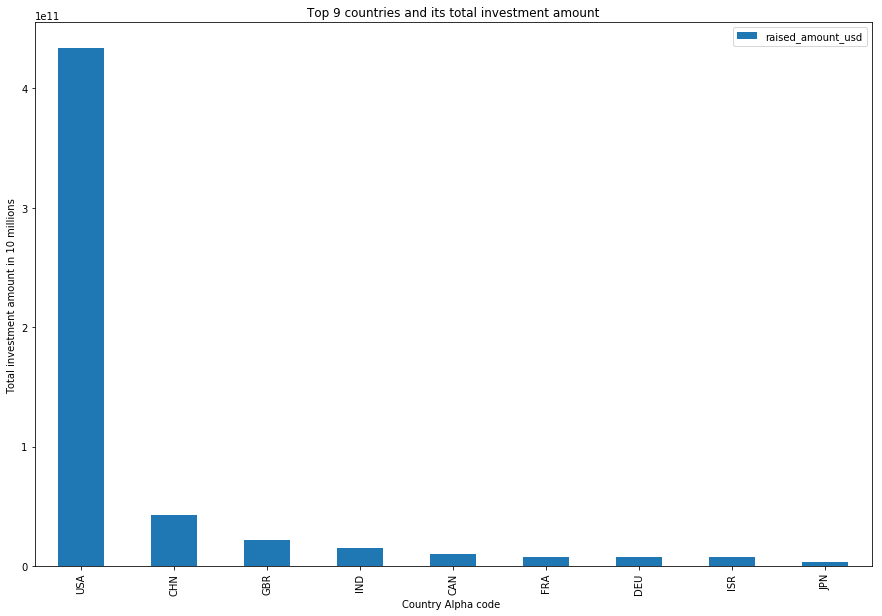

In [204]:
top9.plot(x='country_code',y='raised_amount_usd',kind='bar',figsize=(15,10))
plt.title('Top 9 countries and its total investment amount')
plt.ylabel('Total investment amount in 10 millions ')
plt.xlabel('Country Alpha code ')

#### Plot 3: number of investments in the top 3 sectors of the top 3 countries on one chart

In [205]:
 top3

country_code  raised_amount_usd
100          USA       433675842796
31           GBR        21485627416
41           IND        15231858718

In [206]:
top3_sectors = pd.DataFrame({'TopSector':[D1_no_of_investments_topSector,D2_no_of_investments_topSector,D3_no_of_investments_topSector] ,
                           'SecondBestSector':[D1_no_of_investments_secondBest,D2_no_of_investments_secondBest,D3_no_of_investments_secondBest] ,
                            'ThirdBestSector':[D1_no_of_investments_thirdBestSector,D2_no_of_investments_thirdBestSector,D3_no_of_investments_thirdBestSector]},
                              index=["USA", "GBR", "IND"])

In [207]:
top3_sectors

TopSector  SecondBestSector  ThirdBestSector
USA       8763              8268             7822
GBR        580               481              466
IND        332               193              154

Text(0.5, 0, 'English speaking countries')

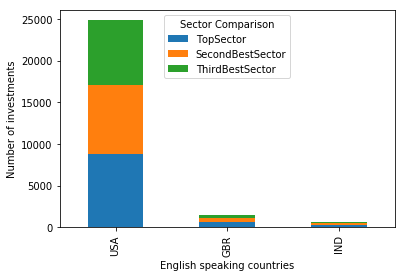

In [208]:
top3_sectors[["TopSector", "SecondBestSector", "ThirdBestSector"]].plot(
    kind="bar", stacked=True
).legend( loc='upper center', ncol=1, title="Sector Comparison")

plt.ylabel('Number of investments')
plt.xlabel('English speaking countries')